# $\chi^2$ distribution
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import gamma

### (1) Define $\chi^2$ experiment

Use standard normal distribution ($\mu=0$, $\sigma=1$) for simplicity


In [2]:
# Result of single measurement

def mychi(npt):
    mes = np.random.normal(size=npt)
    return np.sum(mes*mes)          

In [3]:
# One can also generate multiple measurements in one call (array of chi2 returned)

def myNchi(npt,ngen):
    mes = np.random.normal(size=(ngen,npt))
    return np.sum(mes*mes, axis=1)

### (2) Run multiple experiments

In [4]:
%%time
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 2

# Table to collect results

ch2vec = np.empty(Ntry)

# Standard approach: generate single experiments one by one 

for i in  range(Ntry):
    exp_data = mychi(Nmes)
    ch2vec[i] = exp_data

CPU times: user 440 ms, sys: 35.2 ms, total: 475 ms
Wall time: 443 ms


In [5]:
%%time
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 2

# Optimized approach: generate all measurements in one call

ch2vec = myNchi(Nmes,Ntry)

CPU times: user 6.46 ms, sys: 624 µs, total: 7.08 ms
Wall time: 5.77 ms


### (3) Plot results

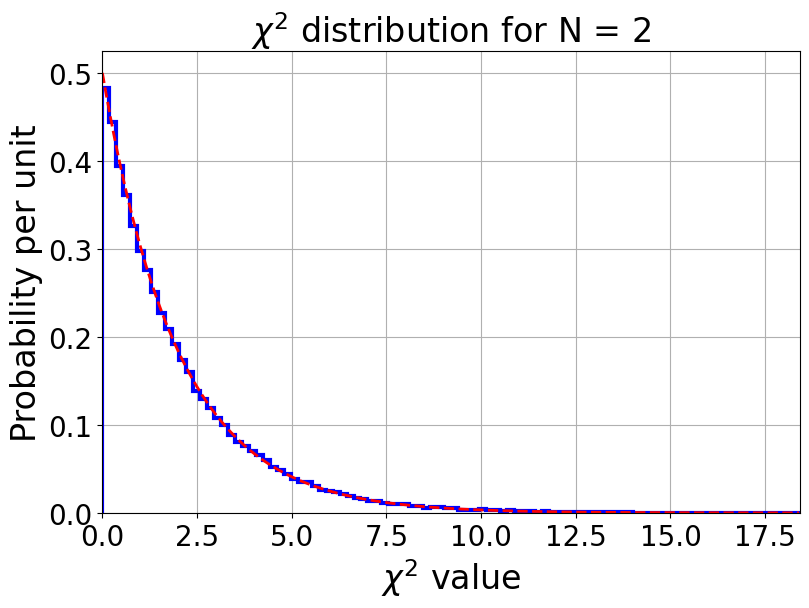

In [6]:
# Plot range to cover 99.99% probability

Xmax=gamma.isf(0.0001,Nmes/2.,0,2.)

Nbin = 100

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(ch2vec,bins=Nbin, range=[0.,Xmax], density=True, log=False, histtype='step',color='blue',linewidth=3)

plt.title("$\\chi^2$ distribution for N = "+str(Nmes),size=24)
plt.xlabel('$\\chi^2$ value',size=24)
plt.ylabel('Probability per unit',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.,Xmax])

plt.grid(which='major', axis='both')

# Expected Gamma distribution

xvec = np.arange(0.,Xmax,0.05)
fvec = gamma.pdf(xvec,Nmes/2.,0,2.)

plt.plot(xvec,fvec,'r--',linewidth=2)

fname = '08_chi2_'+str(Nmes)+'.png'
plt.savefig(fname)

plt.show()

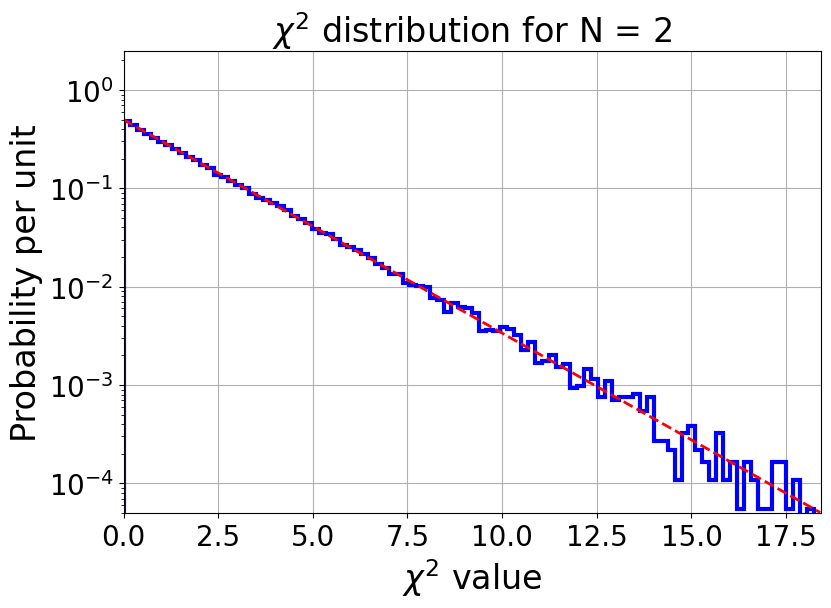

In [7]:
# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(ch2vec,bins=Nbin, range=[0.,Xmax], density=True, log=True, histtype='step',color='blue',linewidth=3)

plt.title("$\\chi^2$ distribution for N = "+str(Nmes),size=24)
plt.xlabel('$\\chi^2$ value',size=24)
plt.ylabel('Probability per unit',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0.,Xmax])
plt.ylim([0.0001/Nmes,5./Nmes])
plt.grid(which='major', axis='both')

plt.plot(xvec,fvec,'r--',linewidth=2)

fname = '08_chi2_'+str(Nmes)+'_log.png'
plt.savefig(fname)

plt.show()